In [1]:
import os
import sys

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
import celloracle as co
co.__version__

/disk2/cai031/miniconda3/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/disk2/cai031/miniconda3/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) ->

'0.17.2'

In [3]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [6,6]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 600

%matplotlib inline

In [4]:
# Make folder to save plots
save_folder = "figures"
os.makedirs(save_folder, exist_ok=True)

In [6]:
# Load adata and base_GRN.
# Load adata and base_GRN.
import anndata
adata = anndata.read_h5ad("rename_TET2_BM_scVelo.h5ad")
adata

AnnData object with n_obs × n_vars = 4792 × 30065
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'barcode', 'UMAP_1', 'UMAP_2', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'cell_type_colors', 'neighbors', 'orig.ident_colors', 'seurat_clusters_colors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [7]:
print(f"Cell number is :{adata.shape[0]}")
print(f"Gene number is :{adata.shape[1]}")

Cell number is :4792
Gene number is :30065


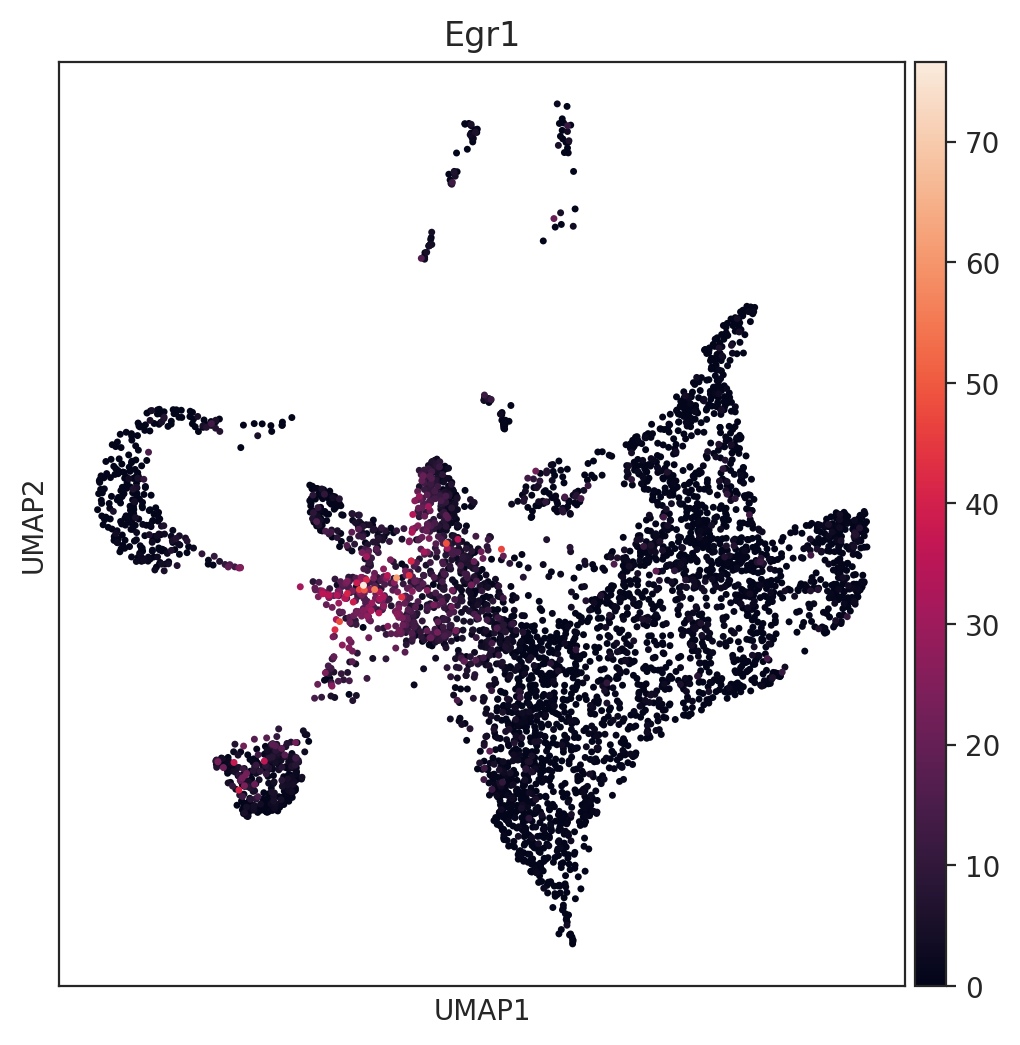

In [8]:
# Check gene expression 
goi = "Egr1"
sc.pl.umap(adata, color=[goi])

In [9]:
# Random downsampling into 30K cells if the anndata object include more than 30 K cells.
n_cells_downsample = 2500
if adata.shape[0] > n_cells_downsample:
    # Let's dowmsample into 30K cells
    sc.pp.subsample(adata, n_obs=n_cells_downsample, random_state=123)

In [10]:
#use this
import numpy as np

# 删除表达为0的基因
non_zero_genes = np.sum(adata.X, axis = 0) != 0
adata = adata[:, non_zero_genes]

In [11]:
print(f"Cell number is :{adata.shape[0]}")
print(f"Gene number is :{adata.shape[1]}")

Cell number is :2500
Gene number is :15568


In [12]:
adata.shape[1]

15568

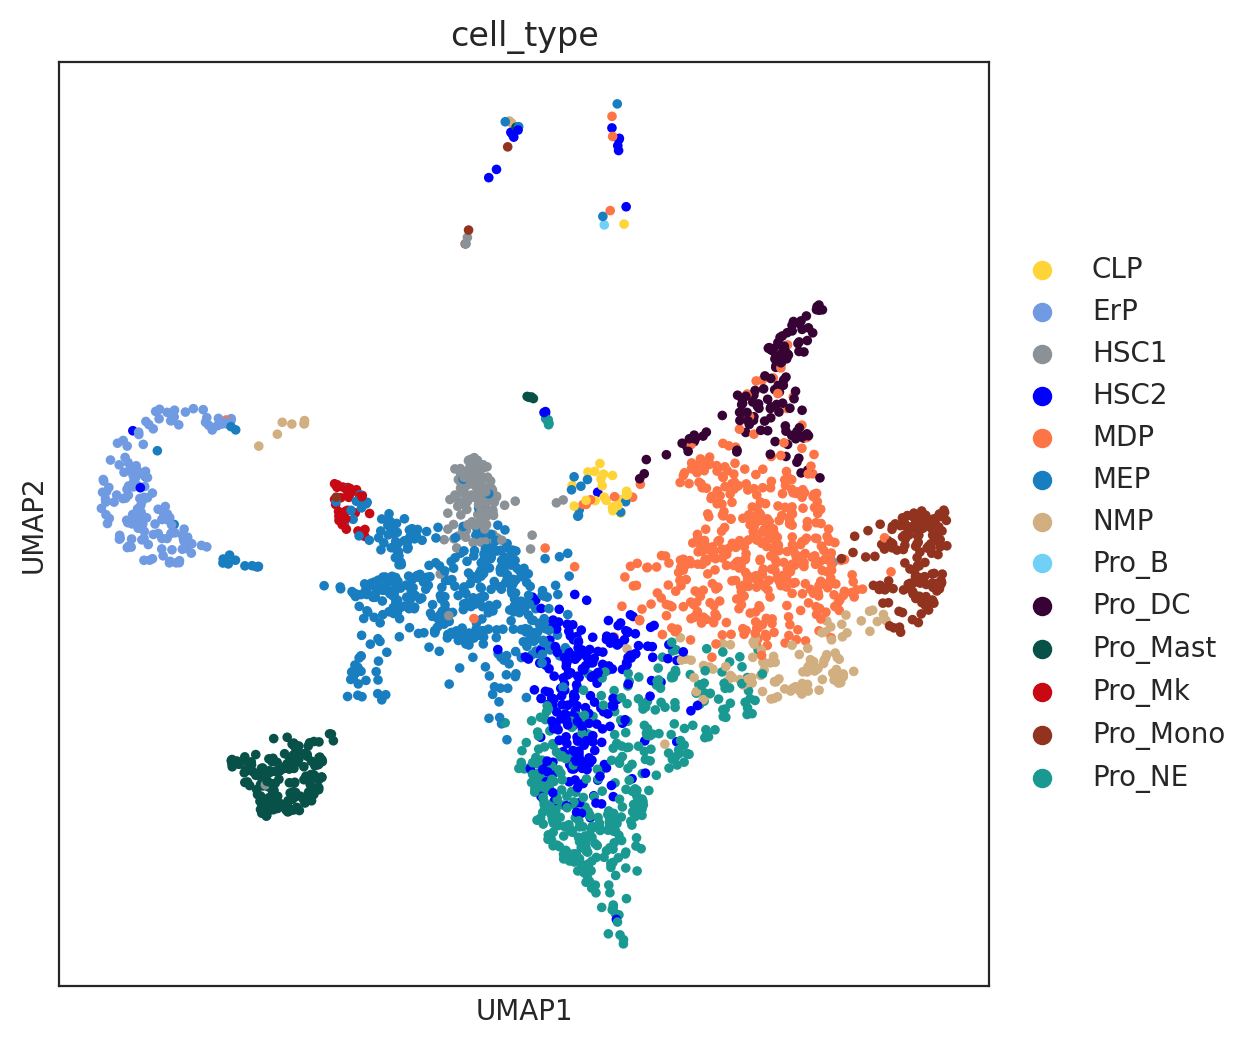

In [13]:
# Check gene expression 
goi = "Egr1"
sc.pl.umap(adata, color='cell_type')

In [14]:
# Load TF info which was made from mouse cell atlas dataset.
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()

# Check data
base_GRN.head()

,peak_id,gene_short_name,9430076c15rik,Ac002126.6,Ac012531.1,Ac226150.2,Afp,Ahr,Ahrr,Aire,...,Znf784,Znf8,Znf816,Znf85,Zscan10,Zscan16,Zscan22,Zscan26,Zscan31,Zscan4
0,chr10_100050979_100052296,4930430F08Rik,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10_101006922_101007748,SNORA17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,chr10_101144061_101145000,Mgat4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,chr10_10148873_10149183,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10_10149425_10149815,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
### START STEP 1.2
### START
### START
# Instantiate Oracle object

oracle = co.Oracle()

In [16]:
# Check data in anndata
print("Metadata columns :", list(adata.obs.columns))
print("Dimensional reduction: ", list(adata.obsm.keys()))

Metadata columns : ['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'barcode', 'UMAP_1', 'UMAP_2', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition']
Dimensional reduction:  ['X_pca', 'X_umap', 'velocity_umap']


In [17]:
adata.layers

LayersView with keys: Ms, Mu, ambiguous, matrix, spliced, unspliced, variance_velocity, velocity

In [18]:
adata.X

<2500x15568 sparse matrix of type '<class 'numpy.float32'>'
	with 4513899 stored elements in Compressed Sparse Row format>

In [19]:
# Instantiate Oracle object.
oracle.import_anndata_as_raw_count(adata=adata,
                                   cluster_column_name="cell_type",
                                   embedding_name="X_umap")

15568 genes were found in the adata. Note that Celloracle is intended to use around 1000-3000 genes, so the behavior with this number of genes may differ from what is expected.


In [20]:
# You can load TF info dataframe with the following code.
oracle.import_TF_data(TF_info_matrix=base_GRN)

In [21]:
oracle

Oracle object

Meta data
    celloracle version used for instantiation: 0.17.2
    n_cells: 2500
    n_genes: 15568
    cluster_name: cell_type
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 21256 genes
    n_regulatory_in_TFdict: 1093 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 543 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 12252 genes
    k_for_knn_imputation: NA
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Not finished
    Knn imputation: Not finished
    GRN calculation for simulation: Not finished

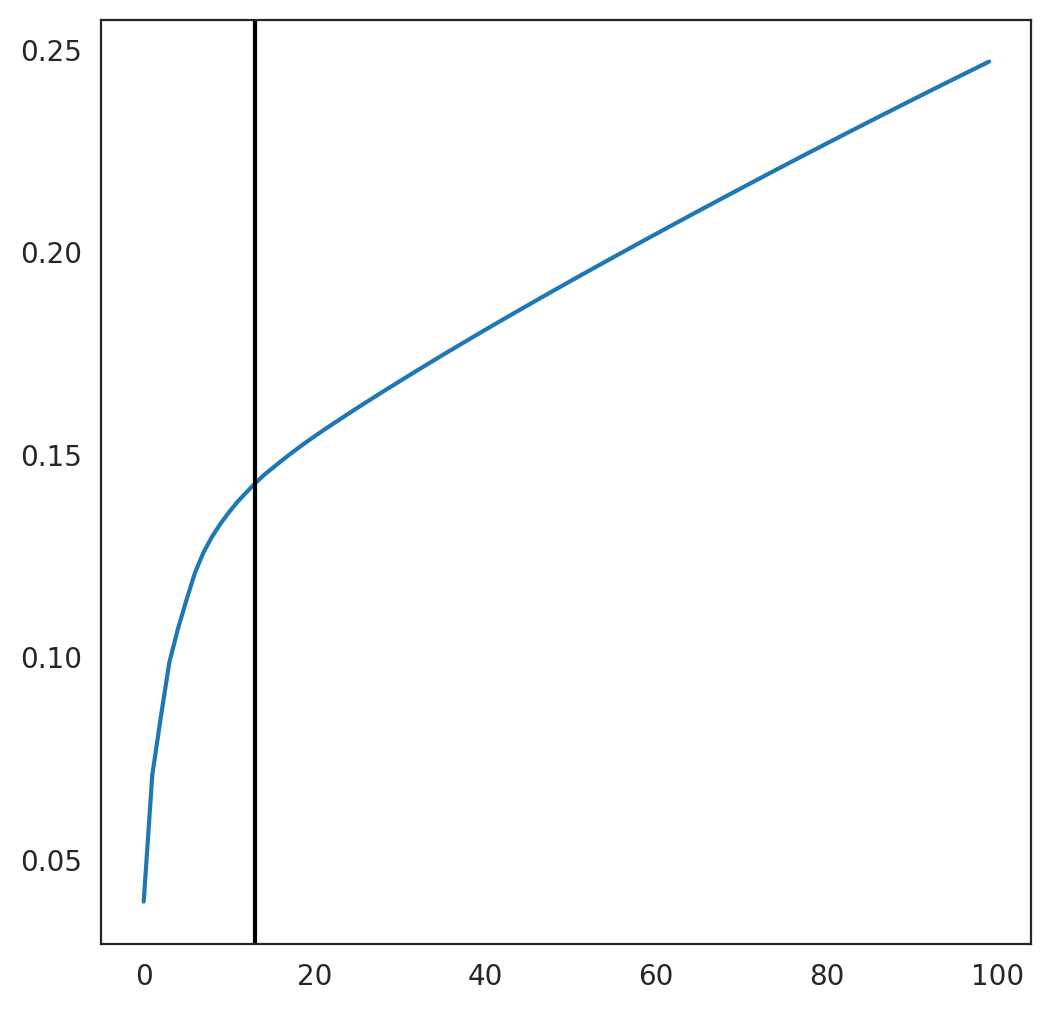

13


In [22]:
### START
### START STEP 1.3 regular normalization and umap information
# Perform PCA
oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

In [23]:
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

cell number is :2500


In [24]:
k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")

Auto-selected k is :62


In [25]:
%%time
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=20)

CPU times: user 12.7 s, sys: 242 ms, total: 13 s
Wall time: 17.8 s


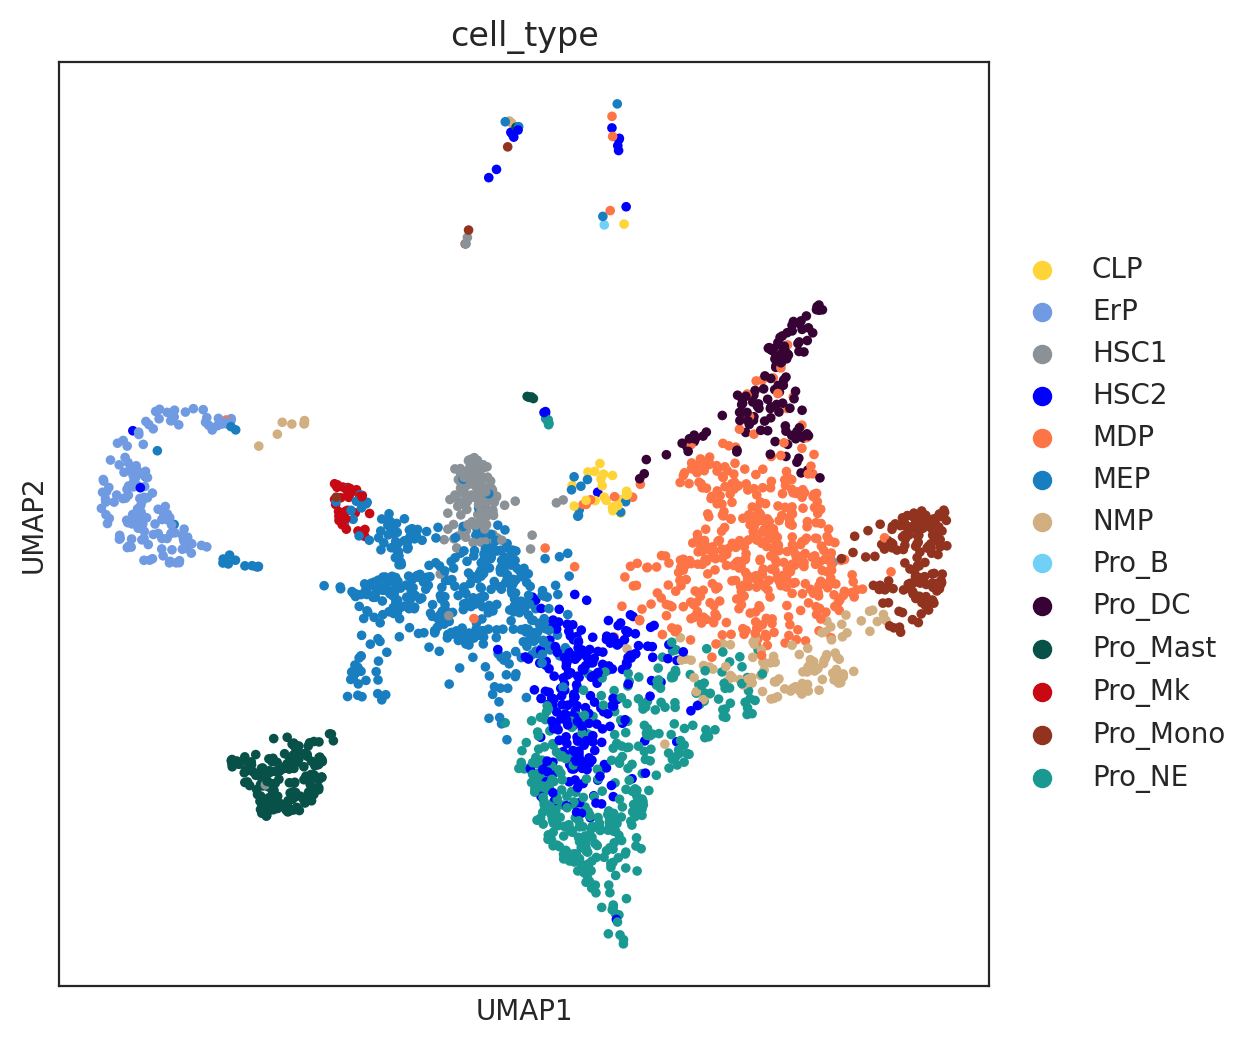

In [26]:
sc.pl.umap(oracle.adata, color="cell_type", save="figures_TET2_veh_test1.pdf")

In [28]:
# Save oracle object.
oracle.to_hdf5("Test1_TET2_down.celloracle.oracle")

# Load file.
# oracle = co.load_hdf5("Paul_15_data.celloracle.oracle")

In [29]:
# 0. Import

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

import celloracle as co
co.__version__

'0.17.2'

In [30]:
oracle.adata

AnnData object with n_obs × n_vars = 2500 × 15568
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'barcode', 'UMAP_1', 'UMAP_2', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators'
    uns: 'cell_type_colors', 'neighbors', 'orig.ident_colors', 'seurat_clusters_colors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'log1p'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'variance_velocity', 'velocity', 'raw_count', 'normalized_count', 'imputed_count'
    obsp: 'connectivities', 'distances'

In [31]:
oracle

Oracle object

Meta data
    celloracle version used for instantiation: 0.17.2
    n_cells: 2500
    n_genes: 15568
    cluster_name: cell_type
    dimensional_reduction_name: X_umap
    n_target_genes_in_TFdict: 21256 genes
    n_regulatory_in_TFdict: 1093 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 543 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 12252 genes
    k_for_knn_imputation: 62
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Not finished

In [ ]:
%%time
# don't run this step; may take you 6 hours
# Calculate GRN for each population in "louvain_annot" clustering unit.
# This step may take some time.(~30 minutes)
links = oracle.get_links(cluster_name_for_GRN_unit="cell_type", alpha=10,
                         verbose_level=10)

# Save Links object.
links.to_hdf5(file_path="Tet2_links_down.celloracle.links")

#CPU times: user 4h 33min 55s, sys: 4min 50s, total: 4h 38min 45s
#Wall time: 6h 39min 43s

  0%|          | 0/13 [00:00<?, ?it/s]

Inferring GRN for CLP...


  0%|          | 0/12252 [00:00<?, ?it/s]

Inferring GRN for ErP...


  0%|          | 0/12252 [00:00<?, ?it/s]